## PROJECT: Car Price Analysis

### INTRODUCTION: 
This is a car price analysis, we'll be finding out how the various features of a car e.g Engine HP, Engine Cylinder, Number of doors etc affect the price of the car

### QUESTIONS:
1. How does Engine HP affect the price of a car
2. How does Engine Cylinder affect the price of a car
3. How does highway MPG affect price of a car
4. How does city MPG affect the price of a car
5. How does Number of Door of a car affect it's price
6. Which features are importance in determining the prices of cars


### TABLE OF CONTENT
1. IMPORT DATA FROM MODULE
2. ANALYZING INDIVIDUAL FEATURE PATTERNS USING VISUALIZATION
3. DESTRIPTION STATISTICAL ANALYSIS
4. BASICS OF GROUPING
5. CORRELATION AND CAUSATION
6. ANOVA

In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn

#stats
from scipy import stats

#plotting
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling

In [2]:
#IMPORT DATA FROM MODULE

car = pd.read_csv ("/Users/user/Downloads/data.csv")
car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
car.shape

(11914, 16)

In [4]:
#list the datatype for each column

print(car.dtypes)

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


In [5]:
car.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
car.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [8]:
Cylinder_mean = car["Engine Cylinders"].mean()

In [9]:
HP_mean = car["Engine HP"].mean()

In [10]:
number_doors_mean = car["Number of Doors"].mean()

In [11]:
car["Engine Cylinders"].fillna(Cylinder_mean, inplace = True)

In [12]:
car["Engine HP"].fillna(HP_mean, inplace = True)

In [13]:
car["Number of Doors"].fillna(number_doors_mean, inplace = True)

In [14]:
car.drop('Market Category',inplace=True,axis=1)

In [15]:
car.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

lets convert Engine Fuel Type from object to str so that we can use mode to fill in the miss value

In [16]:
car["Engine Fuel Type"] = car["Engine Fuel Type"].astype(str)

In [17]:
fuel_type_mode = car["Engine Fuel Type"].mode()

In [18]:
car["Engine Fuel Type"].fillna(fuel_type_mode, inplace = True)

In [19]:
car.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

there are 11914 rows and 15 columns in this dataset.
they are missing value in Engine HP, Engine Cylinder, Number of Doors.
I filled it in the their mean respectively,
I changed the data type of Engine Fuel Type to str. found its mode and filled in the missing value,
I dropped the Market Category columns cause it wasn't neccessary in my analysis.

## ANALYZING INDIVIDUAL FEATURE PATTERNS USING VISUALIZATION
## how to choose the right visualization method
when visualizing individaul variables, it is important to first understand what type of variable you are dealing with.
this will help us find the right visualization method for that variable

## 1. what is the datatype of column "Engine HP"?

ANSWER: Float 64

In [20]:
# we can calculate the correlation btw the int64 values and float64 values 

car.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351288,-0.041446,0.263756,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351288,1.000000,0.764986,-0.102511,-0.353343,-0.346308,0.037315,0.661644
Engine Cylinders,-0.041446,0.764986,1.000000,-0.139607,-0.602294,-0.566980,0.041125,0.531272
Number of Doors,0.263756,-0.102511,-0.139607,1.000000,0.116669,0.118932,-0.048271,-0.126521
highway MPG,0.258240,-0.353343,-0.602294,0.116669,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.346308,-0.566980,0.118932,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037315,0.041125,-0.048271,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.661644,0.531272,-0.126521,-0.160043,-0.157676,-0.048476,1.000000


## 2. find th correlation btwn the following columns: Engine HP, Engine Cylinder, Number of doors and popularity


In [21]:
car[["Engine HP", "Engine Cylinders", "Number of Doors", "Popularity"]].corr()

,Engine HP,Engine Cylinders,Number of Doors,Popularity
Engine HP,1.000000,0.764986,-0.102511,0.037315
Engine Cylinders,0.764986,1.000000,-0.139607,0.041125
Number of Doors,-0.102511,-0.139607,1.000000,-0.048271
Popularity,0.037315,0.041125,-0.048271,1.000000


## continous numerical variables:
this are variables that may contain any value within some range, it can have type int64 or float64, and a great way to visualize this variable is by using scatterplot with fitted lines

in other to start understanding the linear relationship btwn an individual variable and price. we can do this by using "regression regplot", which plot the scatter plot plus the fitted regression line for the data

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 2171004.7288853587)

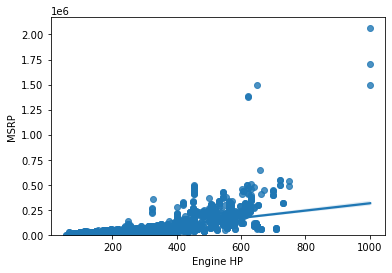

In [22]:
#sactterplot of Engine HP and price

sns.regplot("Engine HP", "MSRP", data = car);
plt.ylim(0, )

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 2172793.296324131)

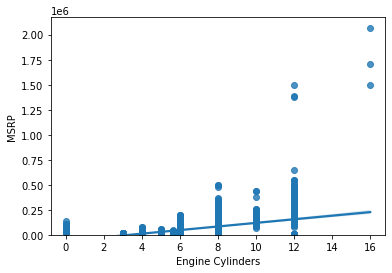

In [23]:
#sactterplot of Engine Cylinders and price

sns.regplot("Engine Cylinders", "MSRP", data = car);
plt.ylim(0, )

As the Engine HP and Engine Cylinders geos up the prices goes up a little, this indicate possitive direct correlation

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


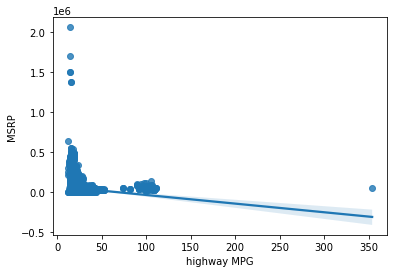

In [24]:
sns.regplot("highway MPG", "MSRP", data = car);
#plt.ylim(0, )

As highway MPG goes up price goes down, i.e negative correlation

## weak linear relationship

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


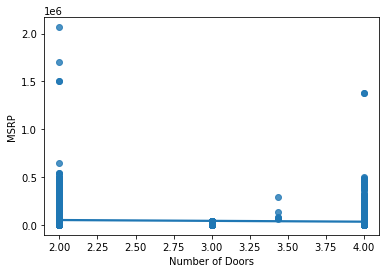

In [25]:
sns.regplot("Number of Doors", "MSRP", data = car);

Number of Doors does not affect the price of a car

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


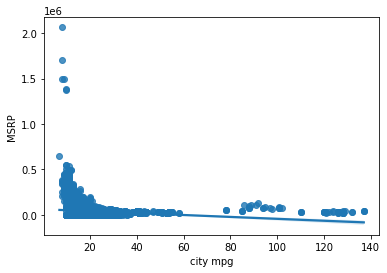

In [26]:
sns.regplot("city mpg", "MSRP", data = car);

no correlation between city mpg and price of car

## Which features are importance in determining the prices of cars

In [27]:
car.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351288,-0.041446,0.263756,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351288,1.000000,0.764986,-0.102511,-0.353343,-0.346308,0.037315,0.661644
Engine Cylinders,-0.041446,0.764986,1.000000,-0.139607,-0.602294,-0.566980,0.041125,0.531272
Number of Doors,0.263756,-0.102511,-0.139607,1.000000,0.116669,0.118932,-0.048271,-0.126521
highway MPG,0.258240,-0.353343,-0.602294,0.116669,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.346308,-0.566980,0.118932,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037315,0.041125,-0.048271,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.661644,0.531272,-0.126521,-0.160043,-0.157676,-0.048476,1.000000


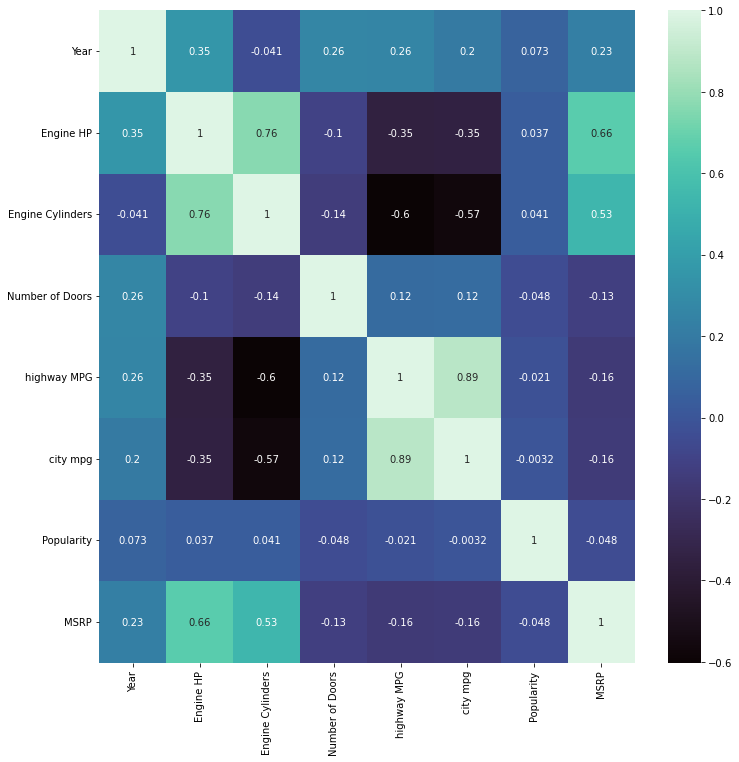

In [28]:
#plotting a heatmap of the above correlation

plt.figure(figsize=(12,12))
sns.heatmap(data=car.corr(),annot=True,cmap="mako")
plt.show()

From my correlation table and the heapmap graph I discovered that Engine HP and Engine Cylinders are the features that can affect the price of the car

## categorical variables
these are variables that describe a characteristic of a data unit and are selected from a small group of categories.
these variables can have type "object" or int64. a good way to visualize categorical variable is by using boxplots.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


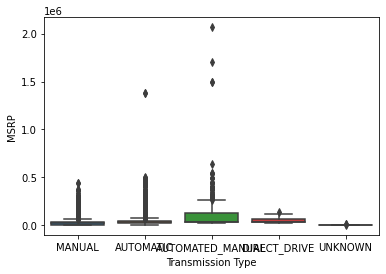

In [29]:
sns.boxplot("Transmission Type", "MSRP", data = car);

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


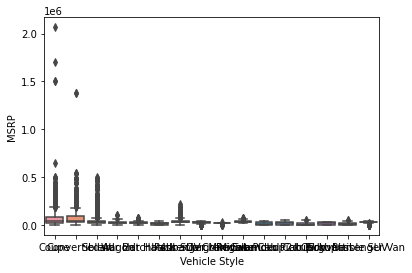

In [30]:
sns.boxplot("Vehicle Style", "MSRP", data = car);

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


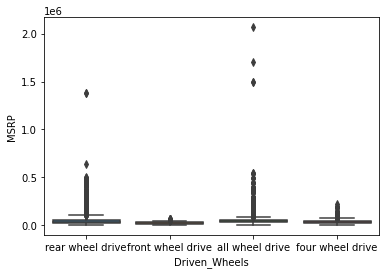

In [31]:
sns.boxplot("Driven_Wheels", "MSRP", data = car);

## descriptive statistical analysis
the descriptive functio autmatically computes basic statistics for all continous variables. any NaN values are automatically skipped in these statistics.
. the count of that variable
. mean
. STD
. minimum value
. IQR interquartile range: 25%, 50%, and 70%
. maximum value

In [32]:
car.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.386070,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,108.875192,1.778316,0.881093,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [33]:
car.describe(include = ["object"])

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
count,11914,11914,11914,11914,11914,11914,11914
unique,48,915,11,5,4,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Compact,Sedan
freq,1123,156,7172,8266,4787,4764,3048


## value count
value count is a good way of understanding how many unit of each characteristic/variable we have. dont forget the method "value count" only works on pandas Series not pandas DataFrames. as a result we only include one bracket not two

In [34]:
car["Driven_Wheels"].value_counts()

front wheel drive    4787
rear wheel drive     3371
all wheel drive      2353
four wheel drive     1403
Name: Driven_Wheels, dtype: int64

In [35]:
#we can convert Series to DataFrame as follows

car["Driven_Wheels"].value_counts().to_frame()

,Driven_Wheels
front wheel drive,4787
rear wheel drive,3371
all wheel drive,2353
four wheel drive,1403


In [36]:
#let repeat the above steps but save the result to the DataFrame 

Driven_Wheels_Counts = car["Driven_Wheels"].value_counts().to_frame()

Driven_Wheels_Counts.rename(columns = {"Driven_Wheels": "value_counts"}, inplace = True)

Driven_Wheels_Counts

,value_counts
front wheel drive,4787
rear wheel drive,3371
all wheel drive,2353
four wheel drive,1403


In [37]:
#let change the index name

Driven_Wheels_Counts.index.name = "Driven_Wheels"
Driven_Wheels_Counts

,value_counts
Driven_Wheels,
front wheel drive,4787
rear wheel drive,3371
all wheel drive,2353
four wheel drive,1403


## Basics of Grouping
The "groupby" method groups data by different categories. the data is grouped based on one or several variables and analysis is performed on the individual groups. 

In [38]:
car["Driven_Wheels"].unique()

array(['rear wheel drive', 'front wheel drive', 'all wheel drive',
       'four wheel drive'], dtype=object)

In [39]:
car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [40]:
# on average which type of drive wheel is more valuable, we can use driven_wheels and then average them 
#(body style,price)

car_group1 = car[["Driven_Wheels", "Vehicle Style", "MSRP"]]
car_group1

,Driven_Wheels,Vehicle Style,MSRP
0,rear wheel drive,Coupe,46135
1,rear wheel drive,Convertible,40650
2,rear wheel drive,Coupe,36350
3,rear wheel drive,Coupe,29450
4,rear wheel drive,Convertible,34500
...,...,...,...
11909,all wheel drive,4dr Hatchback,46120
11910,all wheel drive,4dr Hatchback,56670
11911,all wheel drive,4dr Hatchback,50620
11912,all wheel drive,4dr Hatchback,50920


In [41]:
car_group1 = car_group1.groupby(["Driven_Wheels"], as_index = False).mean()
car_group1

,Driven_Wheels,MSRP
0,all wheel drive,58693.884828
1,four wheel drive,35312.039914
2,front wheel drive,23056.747650
3,rear wheel drive,55064.830317


In [42]:
#we can also group with multiple variables
car_gptest = car[["Driven_Wheels", "Vehicle Style", "MSRP"]]

grouped_test1 = car_gptest.groupby(["Driven_Wheels", "Vehicle Style"], as_index = False).mean()
grouped_test1

,Driven_Wheels,Vehicle Style,MSRP
0,all wheel drive,2dr Hatchback,9240.800000
1,all wheel drive,2dr SUV,35551.363636
2,all wheel drive,4dr Hatchback,32109.603960
3,all wheel drive,4dr SUV,40842.668699
4,all wheel drive,Cargo Minivan,25025.000000
5,all wheel drive,Cargo Van,32760.000000
6,all wheel drive,Convertible,166135.094340
7,all wheel drive,Convertible SUV,47975.000000
8,all wheel drive,Coupe,153839.522843
9,all wheel drive,Crew Cab Pickup,38490.810811


In [43]:
#this grouped data is much easier to visualize when it is made into a pivot table
#a pivot table is like an excel spreedshit

grouped_pivot = grouped_test1.pivot(index = "Driven_Wheels", columns = "Vehicle Style")
grouped_pivot

MSRP                                            \
Vehicle Style     2dr Hatchback       2dr SUV 4dr Hatchback       4dr SUV   
Driven_Wheels                                                               
all wheel drive     9240.800000  35551.363636  32109.603960  40842.668699   
four wheel drive    2000.000000   8162.347826   2000.000000  50361.705645   
front wheel drive  17050.186047           NaN  20567.740995  31842.499208   
rear wheel drive   17805.571429   7614.293103  44671.363636  40605.856764   

                                                                              \
Vehicle Style     Cargo Minivan     Cargo Van    Convertible Convertible SUV   
Driven_Wheels                                                                  
all wheel drive    25025.000000  32760.000000  166135.094340    47975.000000   
four wheel drive            NaN           NaN            NaN    11766.533333   
front wheel drive  21535.925926           NaN   25751.936441             NaN   
rear wheel drive   15663.636364  14904.311828   95570.024390     9880.777778   

                                                                      \
Vehicle Style              Coupe Crew Cab Pickup Extended Cab Pickup   
Driven_Wheels                                                          
all wheel drive    153839.522843    38490.810811        38370.000000   
four wheel drive             NaN    38631.300578        24808.683333   
front wheel drive   14316.455621    32743.000000                 NaN   
rear wheel drive    84602.618343    35470.419795        20278.052795   

                                                                      \
Vehicle Style     Passenger Minivan Passenger Van Regular Cab Pickup   
Driven_Wheels                                                          
all wheel drive        27812.132075  34525.000000        5667.000000   
four wheel drive        2000.000000           NaN       18602.089744   
front wheel drive      27436.131498           NaN                NaN   
rear wheel drive        6979.393939  28927.746032       14239.408511   

                                               
Vehicle Style             Sedan         Wagon  
Driven_Wheels                                  
all wheel drive    54452.355556  37358.648148  
four wheel drive   16145.000000   2000.000000  
front wheel drive  23017.168817  22324.935574  
rear wheel drive   71489.547009  15745.671429

In [44]:
grouped_pivot = grouped_pivot.fillna(0)

grouped_pivot

MSRP                                            \
Vehicle Style     2dr Hatchback       2dr SUV 4dr Hatchback       4dr SUV   
Driven_Wheels                                                               
all wheel drive     9240.800000  35551.363636  32109.603960  40842.668699   
four wheel drive    2000.000000   8162.347826   2000.000000  50361.705645   
front wheel drive  17050.186047      0.000000  20567.740995  31842.499208   
rear wheel drive   17805.571429   7614.293103  44671.363636  40605.856764   

                                                                              \
Vehicle Style     Cargo Minivan     Cargo Van    Convertible Convertible SUV   
Driven_Wheels                                                                  
all wheel drive    25025.000000  32760.000000  166135.094340    47975.000000   
four wheel drive       0.000000      0.000000       0.000000    11766.533333   
front wheel drive  21535.925926      0.000000   25751.936441        0.000000   
rear wheel drive   15663.636364  14904.311828   95570.024390     9880.777778   

                                                                      \
Vehicle Style              Coupe Crew Cab Pickup Extended Cab Pickup   
Driven_Wheels                                                          
all wheel drive    153839.522843    38490.810811        38370.000000   
four wheel drive        0.000000    38631.300578        24808.683333   
front wheel drive   14316.455621    32743.000000            0.000000   
rear wheel drive    84602.618343    35470.419795        20278.052795   

                                                                      \
Vehicle Style     Passenger Minivan Passenger Van Regular Cab Pickup   
Driven_Wheels                                                          
all wheel drive        27812.132075  34525.000000        5667.000000   
four wheel drive        2000.000000      0.000000       18602.089744   
front wheel drive      27436.131498      0.000000           0.000000   
rear wheel drive        6979.393939  28927.746032       14239.408511   

                                               
Vehicle Style             Sedan         Wagon  
Driven_Wheels                                  
all wheel drive    54452.355556  37358.648148  
four wheel drive   16145.000000   2000.000000  
front wheel drive  23017.168817  22324.935574  
rear wheel drive   71489.547009  15745.671429

## Question: use the : "groupby" function to find the average "price" of each car based on "Vehicle Style"

In [45]:
car_group2 = car[["Vehicle Style","MSRP"]]
car_group2

,Vehicle Style,MSRP
0,Coupe,46135
1,Convertible,40650
2,Coupe,36350
3,Coupe,29450
4,Convertible,34500
...,...,...
11909,4dr Hatchback,46120
11910,4dr Hatchback,56670
11911,4dr Hatchback,50620
11912,4dr Hatchback,50920


In [46]:
car_group2 = car_group2.groupby(["Vehicle Style"]).mean()
car_group2

,MSRP
Vehicle Style,
2dr Hatchback,16867.713439
2dr SUV,10115.188406
4dr Hatchback,22420.866097
4dr SUV,40421.871785
Cargo Minivan,20920.985915
Cargo Van,15280.221053
Convertible,84224.284994
Convertible SUV,17424.137931
Coupe,76248.322048


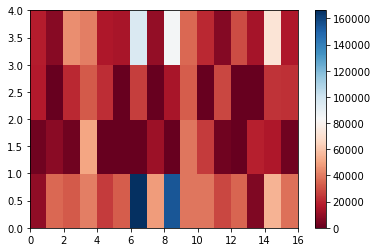

In [47]:
#lets use heatmap to visualize the relationship between Vehicle Style and MSRP

plt.pcolor(grouped_pivot, cmap = "RdBu")
plt.colorbar()
#plt.show()

<AxesSubplot:xlabel='None-Vehicle Style', ylabel='Driven_Wheels'>

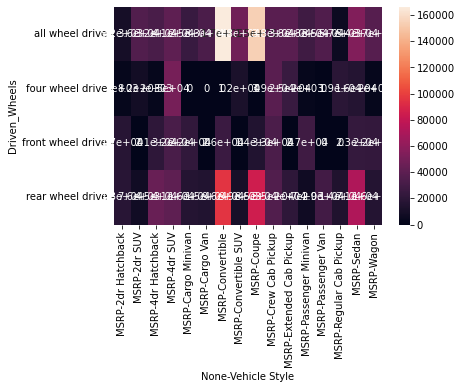

In [48]:
sns.heatmap(grouped_pivot, annot = True)

<function matplotlib.pyplot.show(close=None, block=None)>

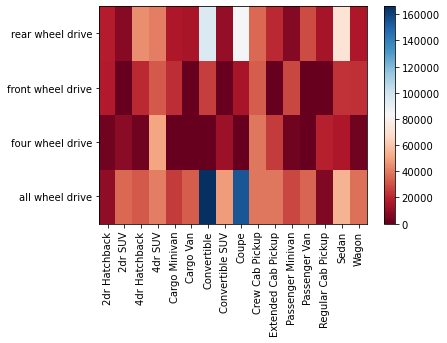

In [49]:
 #the default labels convey no useful information to us, lets change that
    
fig, ax = plt.subplots()

im = ax.pcolor(grouped_pivot, cmap = "RdBu")

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor = False) 
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor = False) 

#insert labels 
ax.set_xticklabels(row_labels, minor = False) 
ax.set_yticklabels(col_labels, minor = False)

#rotate label if too long
plt.xticks(rotation = 90)

fig.colorbar(im)
plt.show

## what are the main characteristics which have the most impact on the car price?
### to get a better measure of the important characteristics, we look at the correlation of these variables 
### with the car price, in other words: how is the car price dependent on this variable?

### CORRELATION: a measure of the extent of interdependence between variables.
### CAUSATION: the relationship btw cause and effectbtw two variables.
its important to know that correlation doesn't imply causation. determining correlation is much simplier than 
determining causation as causation my require independent experimentation.

Pearson Correlation</p>

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Total positive linear correlation.
0: No linear correlation, the two variables most likely do not affect each other.
-1: Total negative linear correlation.



### P-value:

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

### p-value is  <  0.001: we say there is strong evidence that the correlation is significant.
### the p-value is  <  0.05: there is moderate evidence that the correlation is significant.
### the p-value is  <  0.1: there is weak evidence that the correlation is significant.
### the p-value is  >  0.1: there is no evidence that the correlation is significant.
### We can obtain this information using "stats" module in the "scipy" library.

In [50]:
car['Engine HP'].fillna(0, inplace=True)


In [51]:
# lets calculate the pearson correlation coefficient and p_value of Engine HP and Price

pearson_coef, p_value = stats.pearsonr(car["Engine HP"], car["MSRP"])

print("the pearson correlation coefficient is", pearson_coef, "with a p_value of p = ", p_value)

the pearson correlation coefficient is 0.6616442014272395 with a p_value of p =  0.0


In [52]:
pearson_coef, p_value = stats.pearsonr(car["city mpg"], car["MSRP"])

print("the pearson correlation coefficient is", pearson_coef, "with a p_value of p = ", p_value)

the pearson correlation coefficient is -0.15767572242668285 with a p_value of p =  3.4938535989280756e-67


In [53]:
pearson_coef, p_value = stats.pearsonr(car["highway MPG"], car["MSRP"])

print("the pearson correlation coefficient is", pearson_coef, "with a p_value of p = ", p_value)

the pearson correlation coefficient is -0.16004267885202625 with a p_value of p =  3.477593360590622e-69


In [54]:
num_door_mean =car['Number of Doors'].mean()

In [55]:
car["Number of Doors"].fillna(num_door_mean, inplace=True)

In [56]:
pearson_coef, p_value = stats.pearsonr(car["Number of Doors"], car["MSRP"])

print("the pearson correlation coefficient is", pearson_coef, "with a p_value of p = ", p_value)

the pearson correlation coefficient is -0.12652067140499176 with a p_value of p =  1.044015989490472e-43


### ANOVA: 
#### Analysis of Variance
##### The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

#### F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

#### P-value: P-value tells how statistically significant is our calculated score value.

##### If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

In [57]:
#Let's see if different types 'Driven-Wheels' impact 'MSRP', we group the data.

grouped_test2 = car_gptest[['Driven_Wheels', 'MSRP']].groupby(['Driven_Wheels'])

grouped_test2.head(2)

,Driven_Wheels,MSRP
0,rear wheel drive,46135
1,rear wheel drive,40650
17,front wheel drive,2000
18,front wheel drive,2000
19,all wheel drive,2000
21,all wheel drive,2000
481,four wheel drive,37615
482,four wheel drive,34695


In [58]:
car_gptest

,Driven_Wheels,Vehicle Style,MSRP
0,rear wheel drive,Coupe,46135
1,rear wheel drive,Convertible,40650
2,rear wheel drive,Coupe,36350
3,rear wheel drive,Coupe,29450
4,rear wheel drive,Convertible,34500
...,...,...,...
11909,all wheel drive,4dr Hatchback,46120
11910,all wheel drive,4dr Hatchback,56670
11911,all wheel drive,4dr Hatchback,50620
11912,all wheel drive,4dr Hatchback,50920


In [59]:
#we can obtain the value of the method group using the method "get_group"

grouped_test2.get_group("four wheel drive")["MSRP"]

481      37615
482      34695
483      35725
484      43400
486      38645
         ...  
11871    68325
11874    60000
11875    68965
11877    51530
11879    60315
Name: MSRP, Length: 1403, dtype: int64

In [60]:
# we can use the function "f_oneway" in the module stats to obtain the f-test and p-value

f_val, p_val = stats.f_oneway(grouped_test2.get_group("front wheel drive")["MSRP"],
                             grouped_test2.get_group("rear wheel drive")["MSRP"],
                             grouped_test2.get_group("four wheel drive")["MSRP"])
print("ANOVA results: F=", f_val, ", P=", p_val)

ANOVA results: F= 443.9434199062454 , P= 4.308727817403687e-185


## Conclusion:
In conclusion, during the analysis i discovered the dataset has over 10000 rows and 12 columns. there were some missing values which i took care of by filling them with either the mean values and the mode.
and i also discovered that Engine HP and engine cylinder were highly correlated with the price of a vehicle. 

## Limitation
there were some limitations in the dataset as some of the datatypes of features had to be converted to the appropriate types to be able to perform analysis on.
